This notebook shows an example of multiple `Models` sharing the same `Buffer`.

In [1]:
from siamese import (
    Source,
    Machine,
    Buffer,
    Line
)

from siamese.distributions import (
    Uniform,
    Gamma
)

### Shared Buffer

In [2]:
shared_buffer = Buffer(
    name = 'shared_buffer',
    capacity = 50
)

### Fork 1

In [3]:
fork1_source = Source(
    name = 'fork1_source',
    processing_time = Uniform(min=0.5, max=1.5),
    output_buffer = 'fork1_buffer1'
)

fork1_buffer1 = Buffer(
    name = 'fork1_buffer1',
    capacity = 10
)

fork1_machine1 = Machine(
    name = 'fork1_machine1',
    processing_time = Gamma(shape=1, scale=1),
    input_buffer = 'fork1_buffer1',
    output_buffer = 'shared_buffer'
)

fork1_machine2 = Machine(
    name = 'fork1_machine2',
    processing_time = Gamma(shape=1, scale=1),
    input_buffer = 'shared_buffer',
    output_buffer = 'fork1_buffer2'
)

fork1_buffer2 = Buffer(
    name = 'fork1_buffer2',
    capacity = 10
)

fork1_machine3 = Machine(
    name = 'fork1_machine3',
    processing_time = Gamma(shape=1, scale=1),
    input_buffer = 'fork1_buffer2',
    output_buffer = 'fork1_sink'
)

fork1_sink = Buffer(
    name = 'fork1_sink',
    capacity = 200
)

### Fork 2

In [4]:
fork2_source = Source(
    name = 'fork2_source',
    processing_time = Uniform(min=0.5, max=1.5),
    output_buffer = 'fork2_buffer1'
)

fork2_buffer1 = Buffer(
    name = 'fork2_buffer1',
    capacity = 10
)

fork2_machine1 = Machine(
    name = 'fork2_machine1',
    processing_time = Gamma(shape=1, scale=1),
    input_buffer = 'fork2_buffer1',
    output_buffer = 'shared_buffer'
)

fork2_machine2 = Machine(
    name = 'fork2_machine2',
    processing_time = Gamma(shape=1, scale=1),
    input_buffer = 'shared_buffer',
    output_buffer = 'fork2_buffer2'
)

fork2_buffer2 = Buffer(
    name = 'fork2_buffer2',
    capacity = 10
)

fork2_machine3 = Machine(
    name = 'fork2_machine3',
    processing_time = Gamma(shape=1, scale=1),
    input_buffer = 'fork2_buffer2',
    output_buffer = 'fork2_sink'
)

fork2_sink = Buffer(
    name = 'fork2_sink',
    capacity = 200
)

Legend
------
(1) shared_buffer
(2) fork1_source
(3) fork1_buffer1
(4) fork1_buffer2
(5) fork1_machine1
(6) fork1_machine2
(7) fork1_machine3
(8) fork1_sink
(9) fork2_source
(10) fork2_buffer1
(11) fork2_buffer2
(12) fork2_machine1
(13) fork2_machine2
(14) fork2_machine3
(15) fork2_sink


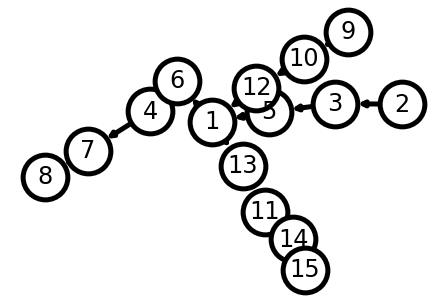

In [28]:
line = Line(

    # Shared Buffer
    shared_buffer,

    # Fork 1
    fork1_source,
    fork1_buffer1,
    fork1_buffer2,
    fork1_machine1,
    fork1_machine2,
    fork1_machine3,
    fork1_sink,

    # Fork 2
    fork2_source,
    fork2_buffer1,
    fork2_buffer2,
    fork2_machine1,
    fork2_machine2,
    fork2_machine3,
    fork2_sink

)

line.plot(seed=25)

In [30]:
line.simulate(time=100)
line.report

fork1_source report
        -------------------
        Model type       :  Source
        Items processed  :  98
        Time processing  :  100.00 (100.00%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  0.00 (0.00%)
        
        fork1_machine1 report
        ---------------------
        Model type       :  Machine
        Items processed  :  93
        Time starved     :  11.01 (11.01%)
        Time processing  :  88.99 (88.99%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  0.00 (0.00%)
        
        fork1_machine2 report
        ---------------------
        Model type       :  Machine
        Items processed  :  81
        Time starved     :  14.79 (14.79%)
        Time processing  :  85.21 (85.21%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  0.00 (0.00%)
        
        fork1_machine3 report
        ---------------------
        Model type       :  Machine
        Items processed  :  77
        Time starved     :  34.54 (34.54%)
        Time processing  :  65.46 (65.46%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  0.00 (0.00%)
        
        fork2_source report
        -------------------
        Model type       :  Source
        Items processed  :  97
        Time processing  :  98.01 (98.01%)
        Time blocked     :  1.99 (1.99%)
        Time broken      :  0.00 (0.00%)
        
        fork2_machine1 report
        ---------------------
        Model type       :  Machine
        Items processed  :  88
        Time starved     :  2.34 (2.34%)
        Time processing  :  97.66 (97.66%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  0.00 (0.00%)
        
        fork2_machine2 report
        ---------------------
        Model type       :  Machine
        Items processed  :  92
        Time starved     :  16.79 (16.79%)
        Time processing  :  83.21 (83.21%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  0.00 (0.00%)
        
        fork2_machine3 report
        ---------------------
        Model type       :  Machine
        Items processed  :  91
        Time starved     :  19.09 (19.09%)
        Time processing  :  80.91 (80.91%)
        Time blocked     :  0.00 (0.00%)
        Time broken      :  0.00 (0.00%)